In [1]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import pylab as pl
import requests

from sklearn import datasets ## imports datasets from scikit-learn
from sklearn import svm

from sklearn import linear_model
from sklearn.externals.joblib import Memory
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_svmlight_file



In [2]:
mem = Memory("/cache")
mem.cache
def get_data():
    data = load_svmlight_file("C:/Users/USER/PythonProjects/ML2017-lab-01-master/DATA/housing_scale.txt",n_features=13)
    print ( "house_data_shape:", data[0].shape, "----house_label_shape:" , data[1].shape)
#    housing_scale.data.shape   
    return data[0], data[1]   
X, y = get_data()



house_data_shape: (506, 13) ----house_label_shape: (506,)


In [3]:
# create training and testing in range (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

X_train=X_train.toarray()
X_test=X_test.toarray()

print ("Train data Shape:",X_train.shape, y_train.shape)
print ("Test data Shape:",X_test.shape, y_test.shape)


Train data Shape: (404, 13) (404,)
Test data Shape: (102, 13) (102,)


In [4]:
#initialize parameters 
iteration = 100
m = 506
m_train = 404
m_test = 102
features=13
theta=[0,0,0,0,0, 0,0,0,0,0, 0,0,0,0]
alpha = 0.001

iteration_num = [1]*iteration;
loss_train  = [1]*iteration;
loss_test  = [1]*iteration;

#defining funtions Linear Regression
def linear_regression(x):
    result = theta[0]
    for i in range (0,features):
        result = result + theta[i+1] * x[i]
    return result
#defining functions Loss
def loss(m,X,y):
    sum=0
    for i in range(0,m):
        sum = sum + ( linear_regression(X[i]) - y[i] ) **2
    sum = sum / (2*m)
    return sum
#defining functions Gradient
def derivative(j,m,X,y):
    sum=0
    
    if(j==0):
         for i in range(0,m):
            sum = sum + ( linear_regression(X[i]) - y[i] ) 
    else:
        for i in range(0,m):
            sum = sum + (linear_regression(X[i]) - y[i] ) *  X[i][j-1]
        sum = sum / m
            
    return sum
def train():
    for i in range(0,iteration):
        
        for j in range(0,features+1):
            theta[j] = theta[j] - alpha * derivative(j,m_train,X_train,y_train)
            
        iteration_num[i] = i;
        loss_train[i] = loss(m_train,X_train,y_train);
        loss_test[i] = loss(m_test,X_test,y_test);
        
            
def information():
    print("loss on train:", loss_train)
    print("loss on test", loss_test)

train()
information()




loss on train: [134.96627529611627, 75.588026036342683, 54.621468320407409, 47.199171643921296, 44.552498608321009, 43.589592292574437, 43.220310174254024, 43.060319037334779, 42.974141512600127, 42.914033963336664, 42.863178143411794, 42.815653778924769, 42.76937923595451, 42.723623938651706, 42.678132214449633, 42.632814954157169, 42.587641249244157, 42.542600397765625, 42.497688635747622, 42.4529045349245, 42.408247425297034, 42.363716865833702, 42.319312473805311, 42.275033874079675, 42.230880686858953, 42.186852526685712, 42.142949004065599, 42.099169727208931, 42.055514303336864, 42.011982339551174, 41.968573443382816, 41.925287223127398, 41.8821232880466, 41.83908124848778, 41.796160715953249, 41.753361303140586, 41.710682623964011, 41.668124293566365, 41.625685928323882, 41.583367145847966, 41.541167564983901, 41.499086805809213, 41.457124489630473, 41.41528023898023, 41.373553677613224, 41.331944430502759, 41.290452123836829, 41.24907638501432, 41.207816842641108, 41.166673126

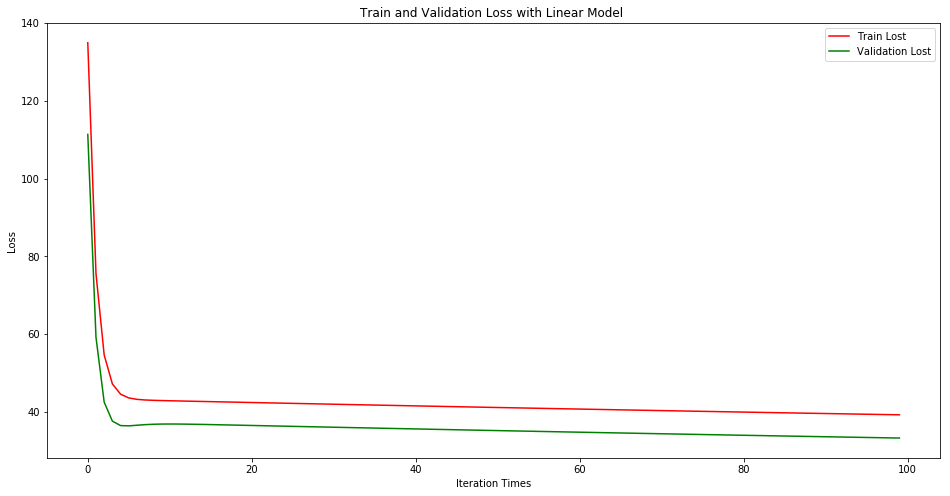

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Train and Validation Loss with Linear Model ")
plt.plot(iteration_num, loss_train,color = 'Red', label='Train Lost')
plt.plot(iteration_num, loss_test, color = 'Green', label='Validation Lost')
plt.legend(loc='upper right')
plt.xlabel('Iteration Times')
plt.ylabel('Loss')
plt.show()


